# Culling - elimination des éléments non visibles


## frustum culling

L'étape de frustum culling consiste à éliminer les éléments qui ne sont pas dans le champ de vision de la caméra. Pour cela, on utilise les valeurs des 6 plans de frustum (gauche, droite, haut, bas, proche, loin) pour déterminer si un objet est dans le champ de vision de la caméra.

Pour chaque objet, on teste si son AABB (Axis Aligned Bounding Box) est en dehors de l'un des 6 plans de frustum. Si c'est le cas, on élimine l'objet.

Pour tester si un AABB est en dehors d'un plan, on utilise la technique suivante : si les deux points extrêmes de l'AABB sont du même 'mauvais' côté du plan, alors l'AABB est en dehors du plan.

Ainsi, il est plus simple de tester si un objet doit être éliminé que de tester si un objet doit être gardé.

Pour ce faire, on réutilise la distance signée d'un point à un plan, et les équations des plans de frustum.


## Etape 1 : coordonnées d'un objet, vu de la caméra

L'objet est défini dans un repère local, propre à l'objet. Pour le placer dans le repère de la caméra, on doit appliquer une transformation MODEL-VIEW.

La transformation **MODEL** permet de passer du repère local de l'objet au repère global de la scène.
La transformation **VIEW** permet de passer du repère global de la scène au repère de la caméra.

La transformation **MODEL-VIEW** est donc la composition de ces deux transformations.

On obtient ainsi les coordonnées de *l'objet* dans le repère de *la caméra*, ce qui permet de tester si l'objet est dans le champ de vision de la caméra.

## Calcul de coordonnées : transformations MODEL / VIEW

[Tranformation Model/View/Projection](https://fr.wikipedia.org/wiki/Produit_vectoriel#Propri%C3%A9t%C3%A9s)



### Illustration de la transformation MODEL

Le maillage de l'objet est exprimé dans un fichier par des coordonnées locales, propres à l'objet. Pour le placer dans la scène, on doit appliquer une transformation MODEL.

Cette transformation indique : la position de l'objet dans la scène, son orientation, sa taille.

On peut ainsi avoir plusieurs objets identiques, mais placés à des endroits différents, avec des tailles différentes, et des orientations différentes.

À partir d'un fichier de maillage, on peut créer plusieurs objets, en appliquant une transformation MODEL différente pour chaque objet.



## exercice : transformation MODEL

On utilise le maillage *'manual.obj'* pour créer 2 objets identiques, mais placés à des endroits différents, avec des tailles différentes, et des orientations différentes.

On applique une transformation MODEL différente pour chaque objet.

**Transformation 1** : position (0,1,0), taille (1,1,1.5)

**Transformation 2** : position (2,0,-1), taille (2,2,2)

Pour ce faire, nous utilisons une fonction Python qui crée un objet à partir d'un fichier de maillage.

In [1]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from file_reader import read_obj, center_origin
class Object:
    def __init__(self, file):
        self.filename = file
        try:
            v,f = read_obj(file)
            v = center_origin(v)
            self.vertices = v.copy()
            self.faces = f.copy()
        except:
            print("Erreur lors de la lecture du fichier")
            self.vertices = []
            self.faces = []
            
    def __str__(self):
        return f"Object [uid:{id(self)}] {self.filename} : {len(self.vertices)} vertices, {len(self.faces)} faces"
    
    def __repr__(self):
        return self.__str__()
    
    def update_vertices(self, new_vertices):
        self.vertices = new_vertices.copy()
        
    def getv(self):
        return self.vertices
    
    def getf(self):
        return self.faces
    
    def getMPmesh(self, ax,color="white",lwidth=0.1,edgec='k',transp=0.5):
        v = np.array(self.vertices)
        faces = self.faces
        polys = [[v[f, :] for f in face] for face in faces]
        return ax.add_collection3d(Poly3DCollection(polys, facecolors=color, linewidths=lwidth, edgecolors=edgec, alpha=transp))
    
    def get_AABB(self):
        # calcul de l'AABB de l'objet
        # On calcule les coordonnées min et max de l'objet
        min_bb = self.vertices[0].copy()
        max_bb = self.vertices[0].copy()
        for v in self.vertices:
            for i in range(3):
                min_bb[i] = min(min_bb[i],v[i])
                max_bb[i] = max(max_bb[i],v[i])
        return min_bb, max_bb

    
meshfile = 'meshes/manual.obj'

o1 = Object(meshfile)
o2 = Object(meshfile)
print(o1)
print(o2)


Object [uid:2052195242000] meshes/manual.obj : 9 vertices, 16 faces
Object [uid:2052459037840] meshes/manual.obj : 9 vertices, 16 faces


**A vous de jouer** : créez une fonction qui applique une transformation MODEL à un objet, et crée un nouvel objet transformé.

La transformation MODEL est définie par une matrice 4x4, qui permet de passer du repère local de l'objet au repère global de la scène.

Ecrivez la fonction *apply_model(obj, matrix)* qui applique la transformation MODEL à un objet, et crée un nouvel objet transformé.

In [9]:
import numpy as np

class TransformedObject:
    def __init__(self, vertices):
        self.vertices = vertices

def apply_model(obj, matrix):
    new_vertices = []
    for v in obj.vertices:
        # Ajouter 1 comme quatrième coordonnée au sommet
        v_homogeneous = np.append(v, 1)
        # Appliquer la matrice de transformation
        tv = np.dot(matrix, v_homogeneous)
        # Retirer la quatrième coordonnée du sommet transformé
        new_vertices.append(tv[:3])
    # Créer un nouvel objet avec les sommets transformés
    transformed_obj = TransformedObject(new_vertices)
    return transformed_obj

**Visualisation des objets**

créez les matrices $T_1$ et $T_2$ qui définissent les transformations MODEL 1 et 2 suivantes :

Transformation 1 : position (4,3,-1), taille (1,1,1.5)
Transformation 2 : position (0,1,1), taille (2,2,2)


In [10]:
from matplotlib import pyplot as plt
import numpy as np

T1 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

T2 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

apply_model(o1, T1)
apply_model(o2, T2)

**ne modifiez pas le code ci-dessous**

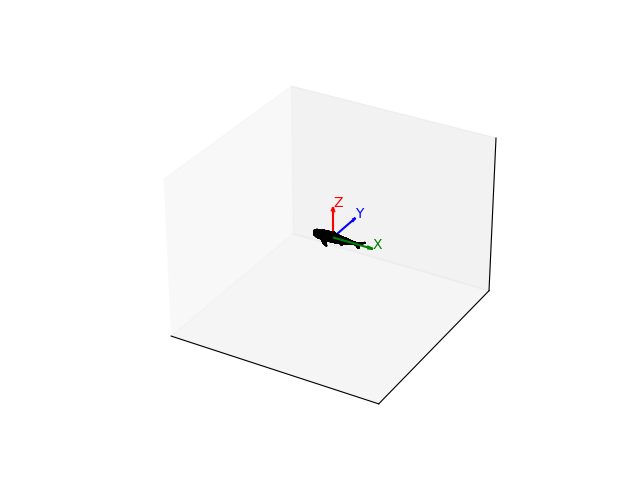

In [12]:
%matplotlib ipympl
from geom_tools import configure_plot
fig,ax = configure_plot()
# set the range of the plot to [-5,5] in all directions
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

m1=o1.getMPmesh(ax,lwidth=1)
# color the second object with r=1, g=1, b=.85
m2=o2.getMPmesh(ax,lwidth=1, color=(1,1,.85))

plt.draw()
plt.show()



** Ajoutez une troisième transformation MODEL ** pour un troisième objet :

Transformation : position(-1,-3,2), taille(2,2,0.5), orientation +$\frac{\pi}{6}$ autour le l'axe $(Oy)$

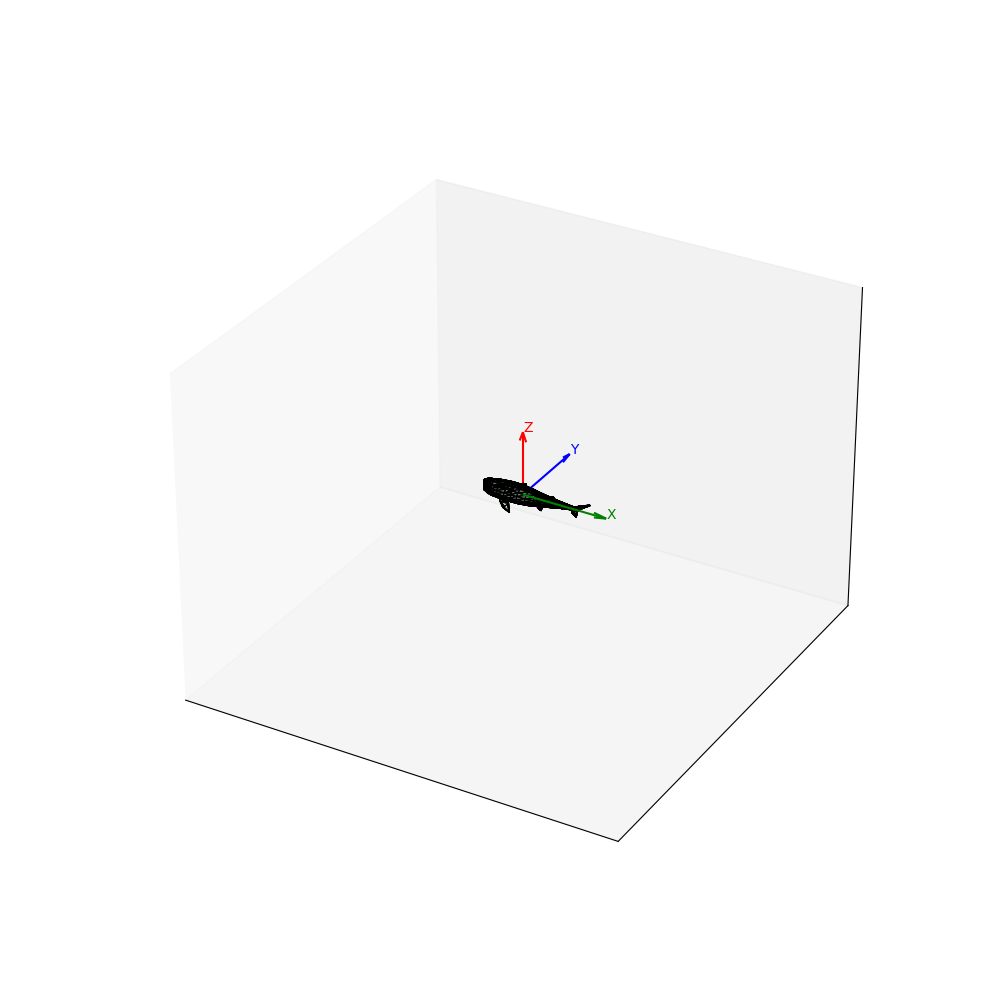

In [13]:
o3 = Object(meshfile)

# matrice de rotation d'angle pi/4 autour de l'axe Oy
R =  np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

T3 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

apply_model(o3, R@T3)

fig,ax = configure_plot()
fig.set_size_inches(10,10)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

m1=o1.getMPmesh(ax,lwidth=1)
m2=o2.getMPmesh(ax,lwidth=1, color=(1,1,.85))
m3=o3.getMPmesh(ax,lwidth=1, color=(.85,1,.85))

plt.draw()
plt.show()

## Transformation VIEW

La transformation VIEW permet de passer du repère global de la scène au repère de la caméra : les coordonnées des sommets de l'objet sont exprimées dans le repère de la caméra, pour effectuer le frustum culling.

La caméra étant considérée comme un objet, elle possède aussi une transformation MODEL $M_{cam}$, qui permet de la placer dans la scène.

La transformation VIEW est globale à tous les objets, et est définie comme l'inverse de la transformation $M_{cam}$, c'est-à-dire $V = M_{cam}^{-1}$

Ainsi, pour un objet $O$, composé de l'ensemble de ses sommets $v_{Obj}$, avec une matrice MODEL $M_{Obj}$, les coordonnées des sommets de l'objet dans le repère de la caméra sont obtenues par $v_{cam} = V . M_{Obj} . v_{Obj}$


In [ ]:
# le bon coté s'est le coté positif

## Frustum culling : application

Pour chaque objet, on teste si son AABB est en dehors de l'un des 6 plans de frustum. Si c'est le cas, on élimine l'objet.

### Partie 1 : définition du frustum à partir des paramètres de la caméra

Nous allons réutiliser les paramètres de la caméra définis dans le notebook précédent, pour obtenir les équations des 6 plans de frustum.

**Rappel** : les paramètres de la caméra sont :
near, far, fov, aspect
Nous associons maintenant à la caméra une transformation MODEL $M_{cam}$, qui permet de la placer dans la scène.

Les équations des 6 plans de frustum sont exprimées dans le repère de la caméra, et sont définies par les paramètres de la caméra.

#### Exercice : complétez la méthode *get_frustum_planes()* de la classe *Camera* pour obtenir les 6 plans de frustum.

###### Étape 1 : calcul des points extrêmes du frustum : reprenez le code de la méthode *frustum_points()* du notebook précédent, et intégrez-le dans une méthode *get_frustum_points()* de la classe *Camera*.

###### Étape 2 : Complétez la méthode *get_frustum_planes()*.

Astuce : le constructeur de la classe *Plane* crée un plan à partir de 3 points, et calcule les coefficients de l'équation du plan.

In [18]:
# Ne modifiez pas la classe Plane
class Plane:
    def __init__(self, p1, p2, p3):
        # calcul des coefficients de l'équation du plan
        # ax + by + cz + d = 0
        # vecteur normal au plan
        v1 = p2 - p1
        v2 = p3 - p1
        normal = np.cross(v1, v2)
        self.a = normal[0]
        self.b = normal[1]
        self.c = normal[2]
        self.d = -self.a*p1[0] - self.b*p1[1] - self.c*p1[2]
        # normalisation
        norm = np.linalg.norm([self.a, self.b, self.c])
        self.a /= norm
        self.b /= norm
        self.c /= norm
        self.d /= norm
        
    def distance(self, point):
        return self.a*point[0] + self.b*point[1] + self.c*point[2] + self.d

    def get_normal(self):
        return np.array([self.a, self.b, self.c])
    
 
    
    
class Camera:
    def __init__(self, near, far, fov, aspect, model):
        # 6 planes
        self.topp = None
        self.bottomp = None
        self.rightp = None
        self.leftp = None
        self.farp = None
        self.nearp = None
        #parameters
        self.near = near
        self.far = far
        self.fov = fov
        self.aspect = aspect
        # model matrix
        self.M = model
        self.V = self.get_view_matrix()
        self.get_frustum_planes()
        
    def get_view_matrix(self):
        # calcul de la matrice VIEW de la caméra
        # inverse de la matrice MODEL de la caméra
        return np.linalg.inv(self.M)
       
    def get_frustum_points(self):
            # compute the 4 near plane points from bottom left corner to top left corner in the camera space
        hhn = np.tan(self.fov / 2) * self.near
        hwn = hhn * self.aspect
        hhf = np.tan(self.fov / 2) * self.far
        hwf = hhf * self.aspect
        near_points = np.array([[-hwn, -hhn, -self.near], [hwn, -hhn, -self.near], [hwn, hhn, -self.near], [-hwn, hhn, -self.near]])
        # compute the 4 far plane points from bottom left corner to top left corner in the camera space
        # use the Thales theorem to compute the far points from the near points
        far_points = np.array([[-hwf, -hhf, -self.far], [hwf, -hhf, -self.far], [hwf, hhf, -self.far], [-hwf, hhf, -self.far]])
        
        return near_points, far_points
    
    def model_view_transform(self, v):
        return np.dot(self.V, v)
    
    # A vous de jouer : complétez la méthode get_frustum_planes()
    def get_frustum_planes(self):
        npts, fpts = self.get_frustum_points()
        # near plane
        self.nearp = Plane(npts[0], npts[2], npts[1])
        # far plane
        self.farp = Plane(fpts[2], fpts[0], fpts[1])
        # top plane
        self.topp = Plane(fpts[3], fpts[2], npts[3])
        # bottom plane
        self.bottomp = Plane(npts[0], npts[1], fpts[1])
        # left plane
        self.leftp = Plane(npts[3], npts[0], fpts[0])
        # right plane
        self.rightp = Plane(npts[1], npts[2], fpts[2])
    
    def plane_list(self):
        return [self.nearp, self.farp, self.topp, self.bottomp, self.leftp, self.rightp]

### Test : visualisation du frustum

** ne modifiez pas le code ci-dessous **, il sert à visualiser le frustum de la caméra.

### Validation
toutes les normales aux plans doivent pointer vers ** l'intérieur ** du frustum.

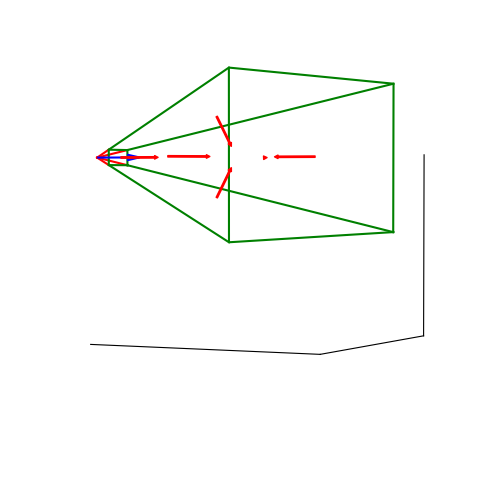

In [19]:
%matplotlib ipympl

import arrow3d
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

cam= Camera(50, 500, np.pi/4, 16/9, np.eye(4))

fig = plt.figure()
fig.set_size_inches(5,5)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
#remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
crange = 500
ax.set_xlim(-crange, 0)
ax.set_ylim(-crange, 0)
ax.set_zlim(-crange, 0)
# switch 3D axes to match the camera space : Z axis is left, Y axis is up, X axis is front
# set the display of the ax to match the camera space
ax.view_init(elev=2, azim=117)
#remove the background for better visibility
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# remove all edges
ax.xaxis.pane.set_edgecolor('none')
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')

# Z->Y Y->X X->Z
Xaxis, Yaxis, Zaxis = (0,1,2)
# indices des axes à afficher
ix=Zaxis
iy=Xaxis
iz=Yaxis

# 
# add a blue quiver line along Z axis
ax.quiver(0, -100*int(iz==0), 0, -100*int(iz==1), 0, -100*int(iz==2), color='b')

near_points, far_points = cam.get_frustum_points()
planes = [cam.nearp, cam.farp, cam.topp, cam.bottomp, cam.leftp, cam.rightp]
# compute centers of the planes, as the average of the 4 points used to define the planes
center_near = np.mean(near_points, axis=0)
center_far = np.mean(far_points, axis=0)
center_top = np.mean([near_points[2], near_points[3], far_points[2], far_points[3]], axis=0)
center_bottom = np.mean([near_points[0], near_points[1], far_points[0], far_points[1]], axis=0)
center_left = np.mean([near_points[0], near_points[3], far_points[0], far_points[3]], axis=0)
center_right = np.mean([near_points[1], near_points[2], far_points[1], far_points[2]], axis=0)
centers= [center_near, center_far, center_top, center_bottom, center_left, center_right]
# draw 4 green lines between (0,0,0) and each of the 4 near points
camera_lines = [ax.plot([0, near_points[i][ix]], [0, near_points[i][iy]], [0, near_points[i][iz]], 'r-')[0] for i in range(4)]
# draw a rectangle from the 4 near points
near_points = np.vstack([near_points, near_points[0]])
far_points = np.vstack([far_points, far_points[0]])
frustum_near, = ax.plot(near_points[:,ix], near_points[:,iy], near_points[:,iz], 'g-')
frustum_far, = ax.plot(far_points[:,ix], far_points[:,iy], far_points[:,iz], 'g-')
frustum_lines = [ax.plot([near_points[i,ix], far_points[i,ix]], [near_points[i,iy], far_points[i,iy]], [near_points[i,iz], far_points[i,iz]], 'g-')[0] for i in range(4)]
# on veut visualiser les normales aux plans : on les affiche en rouge, en partant du centre du plan
size_fac=100
for p,c in zip(planes, centers):
    normal = p.get_normal()
    ax.arrow3D(c[ix],c[iy],c[iz], size_fac*normal[ix], size_fac*normal[iy], size_fac*normal[iz], mutation_scale=5,color='r')
    
plt.draw()
plt.show()

### Partie 2 : ordre des opérations pour le frustum culling

Les 3 opérations à effectuer pour chaque objet sont les suivantes :

Calculer son AABB
Appliquer la transformation MODEL-VIEW
Tester si l'AABB est en dehors du frustum

**Question :** Dans quel ordre appliquer ces opérations ?

**Réponse :** On applique d'abord la transformation MODEL-VIEW, puis on calcule l'AABB, et enfin on teste si l'AABB est en dehors du frustum.


### Synthèse : frustum culling, avec caméra et AABB

Nous allons utiliser tous les éléments précédents pour effectuer le frustum culling sur les objets de la scène :
la caméra, les objets, les transformations MODEL et VIEW, les plans de frustum, les AABB.

la classe *Object* est complétée avec une méthode *get_AABB()* qui calcule les coordonnées de l'AABB de l'objet.

Nous allons créer une scène avec : 
    5 objets, chacun ayant une transformation MODEL différente
    une caméra avec une transformation MODEL (elle est placée dans la scène, ailleurs que l'origine, et pointant dans une certaine direction)
    
*L'objectif de cet exercice est de tester si les objets sont dans le champ de vision de la caméra, en utilisant le frustum culling.*

Pour ceci, nous utiliserons un code couleur :

 les objets visibles seront en *vert*
       
 les objets non visibles seront en *rouge*
       
 les objets partiellement visibles seront en *orange*

---
Vous devez compléter la fonction *frustum_culling()* qui prend en paramètres une liste d'objets, et une caméra, et qui retourne une liste d'objets visibles.

La fonction doit effectuer les opérations suivantes :

  appliquer la transformation VIEW à tous les objets
    
  calculer l'AABB de tous les objets dans le repère de la caméra
    
  tester si les AABB des objets sont en dehors du frustum de la caméra
    
  retourner une liste des objets visibles, une liste des objets non visibles, et une liste des objets partiellement visibles
  
    


In [20]:
def frustum_culling(camera, objects):
    visible = []
    invisible = []
    partially_visible = []
    
    for obj in objects:
        # Appliquer la transformation MODEL-VIEW
        transformed_vertices = [camera.model_view_transform(v) for v in obj.vertices]
        
        # Calculer l'AABB dans le repère de la caméra
        min_bb = [min(v[i] for v in transformed_vertices) for i in range(3)]
        max_bb = [max(v[i] for v in transformed_vertices) for i in range(3)]
        
        in_count = 0
        out_count = 0
        
        for plane in camera.plane_list():
            d1 = plane.distance_to_point(min_bb)
            d2 = plane.distance_to_point(max_bb)
            
            if d1 > 0 and d2 > 0:
                out_count += 1
            elif d1 < 0 and d2 < 0:
                pass  # Les deux points sont du même côté du plan mais à l'intérieur du frustum
            else:
                in_count += 1
        
        if out_count == 0:
            if in_count == len(camera.plane_list()):
                visible.append(obj)
            else:
                partially_visible.append(obj)
        else:
            invisible.append(obj)
    
    return visible, invisible, partially_visible

ValueError: shapes (4,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

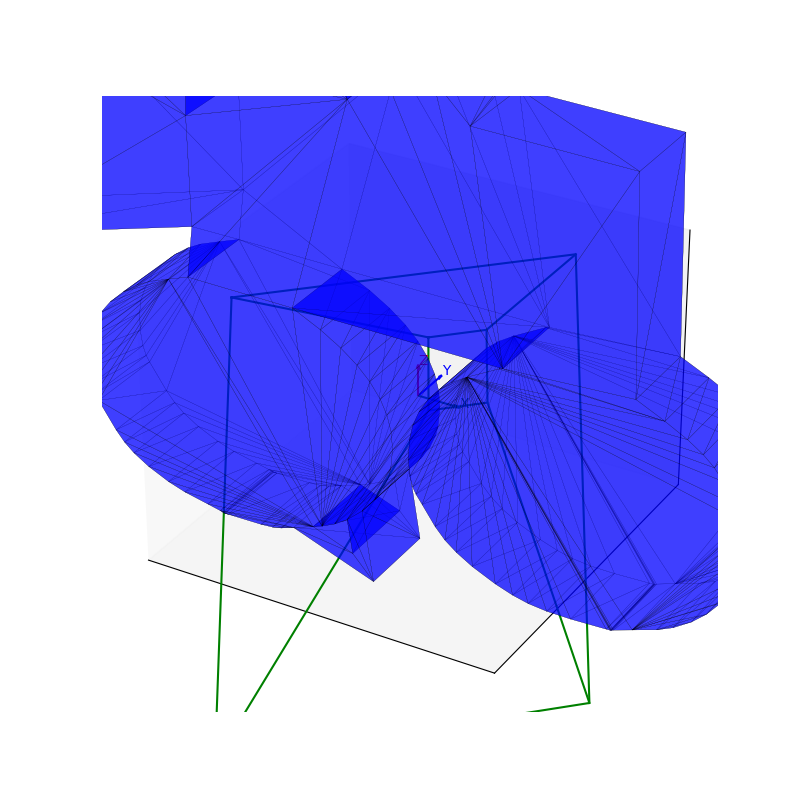

In [21]:
%matplotlib ipympl
from rotation_euler import euler_rotate
# ETAPE 1 : constitution de la scène
# création de 5 objets, chacun avec une transformation MODEL différente
meshfile = r'./meshes/shark.obj'
o1 = Object(meshfile)
o2 = Object(meshfile)
o3 = Object(meshfile)
o4 = Object(meshfile)
o5 = Object(meshfile)
# matrices de transformation MODEL
# repartir les objets dans l'espace (-10,10) x (-10,10) x (-10,10), avec des tailles différentes et des orientations différentes
T1 = np.array([[1,0,0,0],
                [0,1,0,1],
                [0,0,1,0],
                [0,0,0,1]])
T2 = np.array([[2,0,0,8],
                [0,2,0,0],
                [0,0,2,-2],
                [0,0,0,1]])
T3 = np.array([[1,0,0,-2],
                [0,1,0,-6],
                [0,0,1,4],
                [0,0,0,1]])
T4 = np.array([[1,0,0,6],
                [0,1,0,-6],
                [0,0,1,6],
                [0,0,0,1]])
T5 = np.array([[1,0,0,-8],
                [0,1,0,4],
                [0,0,1,-7],
                [0,0,0,1]])
R2 = np.array([[np.cos(np.pi/4), 0, np.sin(np.pi/4), 0],
                [0, 1, 0, 0],
                [-np.sin(np.pi/4), 0, np.cos(np.pi/4), 0],
                [0, 0, 0, 1]])
# rotation de pi/4 autour de l'axe Oz
R3 = np.array([[np.cos(np.pi/6), 0, np.sin(np.pi/6), 0],
                [0, 1, 0, 0],
                [-np.sin(np.pi/6), 0, np.cos(np.pi/6), 0],
                [0, 0, 0, 1]])

# rotation de pi/6 autour de l'axe Oy

R4 = np.array([[1,0,0,0],
                [0,np.cos(np.pi/3), -np.sin(np.pi/3), 0],
                [0,np.sin(np.pi/3), np.cos(np.pi/3), 0],
                [0,0,0,1]])
# rotation de pi/3 autour de l'axe Ox

# application des transformations MODEL
apply_model(o1, T1)
apply_model(o2, R2@T2)
apply_model(o3, R3@T3)
apply_model(o4, R4@T4)
apply_model(o5, T5)

# application de la transformation MODEL à la caméra
# position de la caméra : 1,1,8
Tcam = np.array([[1,0,0,1],
                 [0,1,0,1],
                 [0,0,1,8],
                 [0,0,0,1]])
# orientation de la caméra : rotation de pi/4 autour de l'axe Oz, puis de pi/6 autour de l'axe Oy
rot_cam = euler_rotate(np.pi/4, np.pi/6)
Tcam = rot_cam @ Tcam
# création de la caméra
camera = Camera(near=3, far=20, fov=np.pi/4, aspect=16/9, model=Tcam)


# on positionne le mailage de la caméra dans la scène
cam_meshfile = r'meshes/camera.obj'
camobj = Object(cam_meshfile)

# matrice de transformation MODEL pour le maillage de la caméra : homothétie de facteur k
# et rotation de pi/2 autour de l'axe Oy et inversion de l'axe Z
Tcam_R = np.array([[np.cos(np.pi/2), 0, np.sin(np.pi/2), 0],
                     [0, 1, 0, 0],
                     [-np.sin(np.pi/2), 0, np.cos(np.pi/2), 0],
                     [0, 0, 0, 1]])
T_cam_inv = np.array([[1,0,0,0],
                        [0,1,0,0],
                        [0,0,-1,0],
                        [0,0,0,1]])
k=0.05
Tcam_scale = np.array([[k,0,0,0],
                          [0,k,0,0],
                          [0,0,k,0],
                          [0,0,0,1]])
apply_model(camobj, Tcam@T_cam_inv@Tcam_scale@Tcam_R)

# attention, on a un maillage pour la caméra, qu'on doit synchroniser avec la transformation MODEL de la caméra
# on applique la transformation MODEL à la caméra

# visualisation de la scène
fig,ax = configure_plot()
fig.set_size_inches(8,8)
lim=8
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_zlim(-lim,lim)

# la matérialisation de la caméra
mcam = camobj.getMPmesh(ax, color='blue')

#display the frustum limis in green from frustum points
# apply the camera model transformation to the frustum points
near_points, far_points = camera.get_frustum_points()
near_points = camera.M @ np.vstack([near_points.T, np.ones(4)])
far_points = camera.M @ np.vstack([far_points.T, np.ones(4)])
# draw the near and far planes
near_points = near_points[:3,:].T
far_points = far_points[:3,:].T
# draw the rectangle from the 4 near points
near_points = np.vstack([near_points, near_points[0]])
far_points = np.vstack([far_points, far_points[0]])

frustum_near, = ax.plot(near_points[:,0], near_points[:,1], near_points[:,2], 'g-')
frustum_far, = ax.plot(far_points[:,0], far_points[:,1], far_points[:,2], 'g-')
# draw the lines between near and far points
frustum_lines = [ax.plot([near_points[i,0], far_points[i,0]], [near_points[i,1], far_points[i,1]], [near_points[i,2], far_points[i,2]], 'g-')[0] for i in range(4)]

v,i,p = frustum_culling(camera, [o1, o2, o3, o4, o5])
#creation des visualisations des objets
for obj in v:
    obj.getMPmesh(ax, color='green')
for obj in i:
    obj.getMPmesh(ax, color='red')
for obj in p:
    obj.getMPmesh(ax, color='orange')


plt.draw()
plt.show()

## Backface culling

Le backface culling consiste à éliminer les faces des objets qui sont orientées vers l'arrière, c'est-à-dire qui ne sont pas visibles.

Pour cela, on utilise la normale à la face, et le vecteur de vue de la caméra. Dans le repère de la caméra, le vecteur de vue est $\overrightarrow{V}_{cam}=(0,0,-1)$.

On élimine les faces pour lesquelles le produit scalaire entre la normale $\vec{n}=(n_x, n_y, n_z)$ à la face et le vecteur $\overrightarrow{V}_{cam}$ est positif.

Or puisque le vecteur de vue est $\overrightarrow{V}_{cam}=(0,0,-1)$, le produit scalaire est égal à $-n_z$.

On veut donc : $-n_z < 0$, c'est-à-dire $n_z > 0$

Nous allons simplement comparer 2 maillages : un maillage avec backface culling, et un maillage sans backface culling.

Pour vous guider, les normales sont affichées en rouge sur le maillage sans backface culling.


In [22]:
meshfile=r'meshes/manual.obj'
manual_1 = Object(meshfile)
manual_2 = Object(meshfile)

# appliquer une transformation MODEL à hand_2
T1 = np.array([[1,0,0,-4],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]])

T2 = np.array([[1,0,0,4],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1]])

apply_model(manual_1, T1@euler_rotate(np.pi/4,np.pi/3))
apply_model(manual_2, T2@euler_rotate(np.pi/4,np.pi/3))
# calculer les normales aux faces de l'objet hand_2
# on suppose que les faces sont triangulaires
# on calcule les normales aux faces
normals = []
for f in manual_2.faces:
    v1 = manual_2.vertices[f[0]]
    v2 = manual_2.vertices[f[1]]
    v3 = manual_2.vertices[f[2]]
    n = np.cross(v2-v1, v3-v1)
    # normalize n
    n = n / np.linalg.norm(n)
    normals.append(n)

iz=1 # map z camera axis to y axis in the plot

TypeError: unsupported operand type(s) for -: 'list' and 'list'

#### PARTIE A COMPLETER : backface culling - sélection des faces visibles pour manual_2

In [ ]:

visible_faces = []

# a vous de jouer

manual_2.faces = visible_faces

### PARTIE A NE PAS MODIFIER : visualisation des maillages

In [ ]:
%%matplotlib ipympl
# on va dessiner les facettes avec des traits (plot) au lieu d'une collection de polygones

def plot_faces(ax, obj):
    # dessiner toutes les faces de l'objet en utilisant plot pour un axes3D
    for f in obj.faces:
        v1 = obj.vertices[f[0]]
        v2 = obj.vertices[f[1]]
        v3 = obj.vertices[f[2]]
        ax.plot([v1[0], v2[0], v3[0], v1[0]], [v1[1], v2[1], v3[1], v1[1]], [v1[2], v2[2], v3[2], v1[2]], 'b-', linewidth=0.1)
    return

# elimination des faces avec backface culling pour obj2

fig,ax = configure_plot()
#set azimuth and elevation to match the camera space : -26°, 178°
ax.view_init(elev=-29, azim=-65)
fig.set_size_inches(8,8)
lim=5
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_zlim(-lim,lim)

plot_faces(ax, manual_1)
plot_faces(ax, manual_2)

# add 3d arrows for the normals of the faces for obj1, in red, from the center of the face
for n,f in zip(normals,manual_1.faces):
    v1 = manual_1.vertices[f[0]]
    v2 = manual_1.vertices[f[1]]
    v3 = manual_1.vertices[f[2]]
    center = (v1+v2+v3)/3
    ax.arrow3D(center[0], center[1], center[2], n[0], n[1], n[2], mutation_scale=5, color='r')

plt.draw()
plt.show()
